In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
%matplotlib inline

train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
sexArray = ['male','female']
def getGender(s):
    return sexArray.index(s)

In [3]:
train['Sex'] = train['Sex'].apply(lambda c:getGender(c))

In [4]:
train['Title'] = train['Name'].str.extract(' ([A-za-z]+)\.')

In [5]:
train.Title.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [6]:
titleArray = ['Mr','Miss','Mrs','Master','Dr','Rev','Col','Major','Mlle','Countess','Ms','Lady','Jonkheer',
              'Don','Mme','Capt','Sir']
def getTitleIndex(s):
    if s in titleArray:
        return titleArray.index(s)
    else:
        return -1

In [7]:
train['Title'] = train['Title'].apply(lambda c:getTitleIndex(c))

In [8]:
def getAgeGroup(age):
    if age >0 and age <=20:
        return 0
    elif age >20 and age <= 40:
        return 1
    elif age >20 and age <= 30:
        return 3
    elif age >31 and age <=45:
        return 4
    else:
        return 5

In [9]:
train['Age'].median()

28.0

In [10]:
train['Age'].mean()

29.69911764705882

In [11]:
train['Age'].fillna(train['Age'].median(),inplace = True)

In [12]:
train['AgeGroup'] = train['Age'].apply(lambda x:getAgeGroup(x))

In [13]:
embarkedArray = ['S','C','Q']
def getEmbarkedIndex(s):
    if s in embarkedArray:
        return embarkedArray.index(s)
    else:
        return -1

train['Embarked'].fillna('U',inplace = True)
train['Embarked'] = train['Embarked'].apply(lambda c:getEmbarkedIndex(c))

In [14]:
def isCabinAlotted(s):
    if s is np.nan:
        return 0
    else:
        return 1
    

In [15]:
train['CabinAlotted'] = train['Cabin'].apply(lambda c:isCabinAlotted(c))

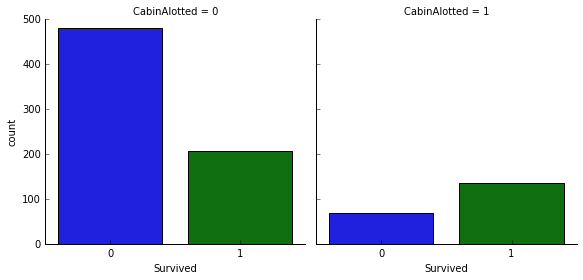

In [16]:
sns.factorplot(x='Survived',col = 'CabinAlotted',kind='count',data=train)

In [17]:
train['FamilySize'] = train['SibSp'] + train['Parch'] 

In [18]:
drop_features = ['PassengerId','Survived','Name','Ticket','Fare','Cabin','Age']

In [19]:
x = train.drop(drop_features,axis=1)

In [20]:
x.head()

,Pclass,Sex,Embarked,AgeGroup,CabinAlotted,FamilySize
0,3,0,0,1,0,1
1,1,1,1,1,1,1
2,3,1,0,1,0,0
3,1,1,0,1,1,1
4,3,0,0,1,0,0


In [21]:
y = train.Survived

In [22]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
test = pd.read_csv('test.csv')

In [24]:
test['Sex'] = test['Sex'].apply(lambda c:getGender(c))
test['Title'] = test['Name'].str.extract(' ([A-za-z]+)\.')
test['Title'] = test['Title'].apply(lambda c:getTitleIndex(c))

In [25]:
test['AgeGroup'] = test['Age'].apply( lambda c:getAgeGroup(c))

In [26]:
test['Age'].median()

27.0

In [27]:
test['Age'].mean()

30.272590361445783

In [28]:
test['Age'].fillna(test['Age'].median(),inplace = True)
test['Embarked'] = test['Embarked'].apply(lambda c:getEmbarkedIndex(c))

In [29]:
test['CabinAlotted'] = test['Cabin'].apply(lambda c:isCabinAlotted(c))
test['FamilySize'] = test['SibSp'] + test['Parch'] 

In [30]:
drop_featuresY = ['PassengerId','Name','Ticket','Fare','Cabin','Age']
test = test.drop(drop_featuresY,axis=1)

In [31]:
test.head()

,Pclass,Sex,Embarked,AgeGroup,CabinAlotted,FamilySize
0,3,0,2,1,0,0
1,3,1,0,5,0,1
2,2,0,2,5,0,0
3,3,0,0,1,0,0
4,3,1,0,1,0,2


In [32]:
from sklearn import tree

In [33]:
model = tree.DecisionTreeClassifier()

In [34]:
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [35]:
pred = model.predict(test)

In [36]:
my_submission = pd.DataFrame({'PassengerId': test.index+892, 'Survived': pred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

In [37]:
#import graphviz
#dot_tree = tree.export_graphviz(model,out_file=None)
#graph = graphviz.Source(dot_tree)
#graph

In [38]:
from sklearn import linear_model

In [39]:
lr = linear_model.LogisticRegression(penalty='l2',max_iter=1000)

In [40]:
from sklearn.svm import SVC

In [41]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts = train_test_split(x,y,test_size = 0.33,random_state = 50)

In [42]:
model.fit(x_tr,y_tr)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
pred4 = model.predict(x_ts)

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_ts,pred4)

0.7898305084745763

In [46]:
lr.fit(x_tr,y_tr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
pred5  = lr.predict(x_ts)

In [48]:
accuracy_score(y_ts,pred5)

0.7932203389830509

In [49]:
dectPred =  model.predict(test)

In [50]:
my_submission = pd.DataFrame({'PassengerId': test.index+892, 'Survived': dectPred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission4.csv', index=False)

In [51]:
logrPred = lr.predict(test)

In [52]:
my_submission = pd.DataFrame({'PassengerId': test.index+892, 'Survived': logrPred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission5.csv', index=False)

In [53]:
sv = SVC()
sv.fit(x_tr,y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
pred6 = sv.predict(x_ts)

In [55]:
accuracy_score(y_ts,pred6)

0.8135593220338984

In [56]:
svPred = sv.predict(test)

In [57]:
my_submission = pd.DataFrame({'PassengerId': test.index+892, 'Survived': svPred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission6.csv', index=False)

In [58]:
from sklearn.ensemble import AdaBoostClassifier

In [59]:
ada = AdaBoostClassifier()

In [60]:
ada.fit(x_tr,y_tr)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [61]:
accuracy_score(y_ts,ada.predict(x_ts))

0.7966101694915254

In [62]:
adaPred = ada.predict(test)

In [63]:
my_submission = pd.DataFrame({'PassengerId': test.index+892, 'Survived': svPred})
# you could use any filename. We choose submission here
my_submission.to_csv('submission7.csv', index=False)